### **Load Dataset**

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("mealworm_growth_daily.csv")

### **Date in order**

In [2]:
df['Date'] = pd.to_datetime(df['Date'])

### **Fill the Missing values**

In [3]:
df.interpolate(method='linear', inplace=True)


ValueError: Invalid fill method. Expecting pad (ffill) or backfill (bfill). Got linear

### **Normalize the Data**

In [4]:
from sklearn.preprocessing import MinMaxScaler
features = ['Temperature_C', 'Humidity_%', 'CO2_ppm', 'GrowthRate_cm_per_day', 'Weight_g', 'Ammonia_ppm']
target = 'Length_cm'

# Normalize input features
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

In [5]:
df = df.sort_values('Date')

### **Feature Engineering**

In [6]:
# Rolling mean of past 3 days (you can use 6 if you had hourly data)
df['Temp_3day_avg'] = df['Temperature_C'].rolling(window=3).mean()
df['Humidity_3day_avg'] = df['Humidity_%'].rolling(window=3).mean()
df['CO2_3day_avg'] = df['CO2_ppm'].rolling(window=3).mean()


In [7]:
# Weight change per day (biomass growth rate)
df['GrowthRate_calc'] = df['Weight_g'].diff()  # assumes 1-day interval


In [8]:
df['LengthRate_calc'] = df['Length_cm'].diff()


In [9]:
df['Delta_Temperature'] = df['Temperature_C'].diff()
df['Delta_Humidity'] = df['Humidity_%'].diff()
df['Delta_CO2'] = df['CO2_ppm'].diff()
df['Delta_Ammonia'] = df['Ammonia_ppm'].diff()


In [10]:
df = df.dropna().reset_index(drop=True)


In [11]:
features = [
    'Temperature_C', 'Humidity_%', 'CO2_ppm', 'Ammonia_ppm', 'Weight_g',
    'Temp_3day_avg', 'Humidity_3day_avg', 'CO2_3day_avg',
    'GrowthRate_calc', 'LengthRate_calc',
    'Delta_Temperature', 'Delta_Humidity', 'Delta_CO2', 'Delta_Ammonia'
]
target = 'Length_cm'


### **Data Prepearation**





In [12]:
# Define the feature columns
features = [
    'Temperature_C', 'Humidity_%', 'CO2_ppm', 'Ammonia_ppm', 'Weight_g',
    'Temp_3day_avg', 'Humidity_3day_avg', 'CO2_3day_avg',
    'GrowthRate_calc', 'LengthRate_calc',
    'Delta_Temperature', 'Delta_Humidity', 'Delta_CO2', 'Delta_Ammonia'
]

# Set X (input features) and y (target/output)
X = df[features]
y = df['Length_cm']


### **Data seperation as X and Y**

In [13]:
X = df[features]
y = df['Length_cm']  # Target variable


### **Data Splitting**

In [14]:
from sklearn.model_selection import train_test_split

# Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
X_train

,Temperature_C,Humidity_%,CO2_ppm,Ammonia_ppm,Weight_g,Temp_3day_avg,Humidity_3day_avg,CO2_3day_avg,GrowthRate_calc,LengthRate_calc,Delta_Temperature,Delta_Humidity,Delta_CO2,Delta_Ammonia
209,0.616541,0.507794,0.678891,0.720588,0.292295,0.718045,0.400762,0.460622,0.004152,0.1720,0.078947,0.423970,0.392751,0.096405
338,0.341165,0.571874,0.511160,0.674837,0.863390,0.411028,0.330793,0.509518,0.005817,0.1332,-0.035714,0.374437,-0.071824,0.390523
357,0.340226,0.496363,0.483914,0.550654,0.968470,0.419486,0.441866,0.506558,0.005190,0.1115,-0.161654,-0.099411,0.011433,-0.261438
75,0.414474,0.108763,0.432403,0.568627,0.035142,0.485276,0.367856,0.485313,0.000389,0.0500,-0.054511,-0.352615,-0.127836,-0.127451
84,0.585526,0.632490,0.568449,0.537582,0.043749,0.438283,0.457337,0.508382,0.001730,0.2024,0.199248,0.176308,0.319771,-0.289216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.677632,0.171805,0.435383,0.496732,0.032158,0.601190,0.382866,0.466075,0.000649,0.0900,0.225564,-0.056114,-0.101867,0.016340
106,0.493421,0.703498,0.699325,0.655229,0.067689,0.565789,0.325367,0.613189,0.002184,0.2021,0.012218,0.499134,0.361734,0.075163
270,0.620301,0.479737,0.530621,0.357843,0.530092,0.511591,0.423277,0.664700,0.005558,0.1659,0.365602,-0.129893,-0.157818,-0.050654
348,0.500940,0.658123,0.456121,0.570261,0.919552,0.427632,0.551553,0.641509,0.008715,0.1925,0.074248,0.197783,-0.218756,0.464052


In [16]:
X_test

,Temperature_C,Humidity_%,CO2_ppm,Ammonia_ppm,Weight_g,Temp_3day_avg,Humidity_3day_avg,CO2_3day_avg,GrowthRate_calc,LengthRate_calc,Delta_Temperature,Delta_Humidity,Delta_CO2,Delta_Ammonia
163,0.515038,0.577416,0.638083,0.588235,0.169741,0.483083,0.466574,0.714347,0.003049,0.1708,-0.078008,0.267059,-0.133796,0.194444
33,0.284774,0.190856,0.391413,0.151961,0.006444,0.388158,0.439788,0.541020,0.000151,0.0500,-0.287594,-0.490475,-0.338016,-0.689542
15,0.500940,0.099065,0.381925,0.769608,0.001514,0.397556,0.261171,0.441018,0.000087,0.0500,0.187030,-0.263942,-0.171866,-0.076797
307,0.428571,0.223069,0.710758,0.439542,0.694514,0.445175,0.344418,0.507997,0.001946,0.0500,-0.105263,-0.179425,0.150094,-0.161765
57,0.593985,0.578802,0.216688,0.660131,0.020545,0.503759,0.546011,0.442397,0.001081,0.1916,0.090226,-0.056460,-0.290275,0.204248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.340226,0.485279,0.472785,0.607843,0.653100,0.485589,0.400531,0.479211,0.004066,0.1084,-0.204887,0.141670,0.139634,-0.086601
82,0.343045,0.283339,0.708022,0.305556,0.041089,0.463972,0.321787,0.682459,0.000411,0.0500,-0.040414,-0.094562,0.152405,-0.385621
94,0.498120,0.473156,0.807943,0.758170,0.053719,0.383145,0.513220,0.677087,0.001298,0.1358,0.248120,-0.333911,0.023049,0.135621
342,0.390038,0.760651,0.701514,0.542484,0.887200,0.422306,0.545895,0.506963,0.008715,0.1967,0.004699,0.654312,0.415861,-0.223856


#**Model Buliding**

## **Linear Regression**

### **Training the model**

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### **Applying the model to make prediction**

In [18]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [19]:
y_lr_train_pred

array([24.94274529, 45.79990642, 48.82820105, 13.91864917,  9.12549486,
       47.74376335, 10.66916676,  9.34812535, 37.64216865,  2.19452121,
       13.78529214, 13.34339912, 47.54012994, 42.52826696, 43.81467868,
       50.77089224, 12.4656048 , 31.40575621,  9.83800357, 21.3199464 ,
       41.30847966, 16.52521358, 25.21656764, 17.14923677, 11.71614849,
       16.84373794,  9.47513643, 21.58667514, 43.93155661, 44.60947622,
       24.9567114 , 15.93398809, 17.62641995, 26.21712673, 50.29597317,
       37.47774994, 20.709462  , 31.82148263, 24.6761682 , 35.83805441,
        7.44639467, 40.50422397,  9.564136  , 26.14429731,  5.5495137 ,
       33.60847216, 14.82018409, 36.24102284, 15.71668183, 11.63365496,
       10.42748763, 18.02987883, 19.55042555, 18.55073621, 31.17636019,
       16.73868243, 41.14076873, 19.41766119, 12.2898206 , 11.64126895,
       16.59898093,  7.3543476 , 31.45658211, 27.27732793,  7.20674197,
       19.52949853, 12.87581875, 13.45306943, 39.308949  , 31.44

In [20]:
y_lr_test_pred

array([17.78887008, 12.35866935, 11.92267403, 36.72231311,  7.68482088,
       20.26045395, 11.40840971, 15.60292593, 31.98108054, 15.008432  ,
       30.40277296, 11.79461234, 27.80578108, 10.80416938, 16.68360183,
       21.82302613, 32.41952788, 25.78881163, 46.62287302, 13.60341673,
        6.2173631 , 21.02177302, 13.58849019, 34.55674822, 41.6178428 ,
       21.09034795, 25.57084136, 18.16728999, 16.24817643, 52.74469998,
       10.95315258, 14.73284195,  9.94664437, 50.52236881, 18.15770252,
       15.32330078, 11.37891827, 10.13309612, 37.03537111, 19.04303114,
       26.89246013, 39.2364867 ,  6.45621919, 37.7784077 , 11.71296106,
       46.77140382, 14.9463399 ,  7.58823363,  3.95156707, 11.11166432,
       28.17436578, 18.20905393, 34.51086287, 24.2307949 , 19.22697498,
       42.76931907, 10.48700437,  8.84676577, 34.81129915, 13.12943955,
       42.83964478, 30.97515991, 10.24963125,  6.7818289 , 41.70170614,
        9.31853746, 24.7468572 , 14.15440399, 37.42180935, 14.45

### **Evaluate model performance**

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [22]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  9.839202241146207
LR R2 (Train):  0.9430973160745495
LR MSE (Test):  11.429097082353184
LR R2 (Test):  0.9392006455474459


In [23]:

lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [24]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,9.839202,0.943097,11.429097,0.939201


## **Random Forest**

### **Training the model**

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### **Applying the model to make prediction**

In [26]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)


### **Evaluate model performance**

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [28]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,7.14194,0.958696,7.721859,0.958922


## **XGBoost**

### **Training the model**

In [29]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

### **Applying the model to make predcitions**

In [30]:
y_xgb_model_train_pred = xgb_model.predict(X_train)
y_xgb_model_test_pred = xgb_model.predict(X_test)

### **Evaluate model performance**

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

xgb_train_mse = mean_squared_error(y_train, y_xgb_model_train_pred)
xgb_train_r2 = r2_score(y_train, y_xgb_model_train_pred)

xgb_test_mse = mean_squared_error(y_test, y_xgb_model_test_pred)
xgb_test_r2 = r2_score(y_test, y_xgb_model_test_pred)

In [32]:
xgb_results = pd.DataFrame(['XGBoost Classifier', xgb_train_mse, xgb_train_r2, xgb_test_mse, xgb_test_r2]).transpose()
xgb_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
xgb_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,XGBoost Classifier,0.000159,0.999999,0.031677,0.999831


## **Comparsion of three models**

In [33]:
df_models = pd.concat([lr_results, rf_results, xgb_results], axis=0)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,9.839202,0.943097,11.429097,0.939201
0,Random forest,7.14194,0.958696,7.721859,0.958922
0,XGBoost Classifier,0.000159,0.999999,0.031677,0.999831


## **Saving the model**

In [34]:
import joblib

joblib.dump(xgb_model, "xgboost_model.pkl")
print("Model saved as xgboost_model.pkl")


Model saved as xgboost_model.pkl


## **Downloading the model**

In [ ]:
from google.colab import files
files.download('xgboost_model.pkl')


## **RMSE value for all the three models**

In [35]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [36]:
# Linear Regression
lr_train_rmse = np.sqrt(mean_squared_error(y_train, y_lr_train_pred))
lr_test_rmse = np.sqrt(mean_squared_error(y_test, y_lr_test_pred))

# Random Forest
rf_train_rmse = np.sqrt(mean_squared_error(y_train, y_rf_train_pred))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, y_rf_test_pred))

# XGBoost
xgb_train_rmse = np.sqrt(mean_squared_error(y_train, y_xgb_model_train_pred))
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, y_xgb_model_test_pred))


In [37]:
print("RMSE for All Models")
print(f"Linear Regression - Train RMSE: {lr_train_rmse:.4f}, Test RMSE: {lr_test_rmse:.4f}")
print(f"Random Forest     - Train RMSE: {rf_train_rmse:.4f}, Test RMSE: {rf_test_rmse:.4f}")
print(f"XGBoost           - Train RMSE: {xgb_train_rmse:.4f}, Test RMSE: {xgb_test_rmse:.4f}")


RMSE for All Models
Linear Regression - Train RMSE: 3.1368, Test RMSE: 3.3807
Random Forest     - Train RMSE: 2.6724, Test RMSE: 2.7788
XGBoost           - Train RMSE: 0.0126, Test RMSE: 0.1780


# **Metrics**

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


## **Define the features**

In [39]:
features = [
    'Temperature_C', 'Humidity_%', 'CO2_ppm', 'Ammonia_ppm', 'Weight_g',
    'Temp_3day_avg', 'Humidity_3day_avg', 'CO2_3day_avg',
    'GrowthRate_calc', 'LengthRate_calc',
    'Delta_Temperature', 'Delta_Humidity', 'Delta_CO2', 'Delta_Ammonia'
]

X = df[features]
y_length = df['Length_cm']

## **Cross Validation**

In [40]:
tscv = TimeSeriesSplit(n_splits=5)


## **Evaluate Each Model**

In [41]:
def evaluate_model(model, X, y, label):
    mae_list = []
    rmse_list = []

    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        mae_list.append(mae)
        rmse_list.append(rmse)

    print(f"{label} - {model.__class__.__name__}")
    print(f"Average MAE:  {np.mean(mae_list):.3f}")
    print(f"Average RMSE: {np.mean(rmse_list):.3f}\n")


## **Evaluate length prediction errors**

In [42]:
# Models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Evaluate for Length_mm
evaluate_model(lr, X, y_length, "Length")
evaluate_model(rf, X, y_length, "Length")
evaluate_model(xgb, X, y_length, "Length")

Length - LinearRegression
Average MAE:  6.284
Average RMSE: 7.083

Length - RandomForestRegressor
Average MAE:  4.262
Average RMSE: 4.781

Length - XGBRegressor
Average MAE:  3.975
Average RMSE: 4.521



# **Prediciton Pipeline**

## **Insert new data**

In [43]:
import pandas as pd
import numpy as np
import joblib  # or pickle
from datetime import datetime

new_data = pd.DataFrame([{
        'date': '02-10-2024',
        'Temperature_C':0.259398496240601,
        'Humidity_%': 0.759265673709733,
        'CO2_ppm': 0.736666058505138,
        'Ammonia_ppm': 0.493464052287581,
        'Weight_g': 0.0911312471616098,
    }])
new_data['date'] = pd.to_datetime(new_data['date'])
new_data = new_data.sort_values('date')

## **feature Engineering for new data**

In [44]:
def preprocess_and_engineer(data, historical_data):
    # Combine to calculate rolling and delta features
    full_data = pd.concat([historical_data, data], ignore_index=True).sort_values('Date')

    # Rolling averages (3-day window)
    full_data['Temp_3day_avg'] = full_data['Temperature_C'].rolling(window=3, min_periods=1).mean()
    full_data['Humidity_3day_avg'] = full_data['Humidity_%'].rolling(window=3, min_periods=1).mean()
    full_data['CO2_3day_avg'] = full_data['CO2_ppm'].rolling(window=3, min_periods=1).mean()

    # Deltas (day-to-day changes)
    full_data['Delta_Temperature'] = full_data['Temperature_C'].diff().fillna(0)
    full_data['Delta_Humidity'] = full_data['Humidity_%'].diff().fillna(0)
    full_data['Delta_CO2'] = full_data['CO2_ppm'].diff().fillna(0)
    full_data['Delta_Ammonia'] = full_data['Ammonia_ppm'].diff().fillna(0)

    # Growth rates (weight and length differences)
    full_data['GrowthRate_calc'] = full_data['Weight_g'].diff().fillna(0)
    full_data['LengthRate_calc'] = full_data['Length_cm'].diff().fillna(0)

    # Fill any remaining missing values
    full_data.fillna(method='ffill', inplace=True)
    full_data.fillna(0, inplace=True)

    # Return only the most recent row (for prediction)
    return full_data.tail(1)

# Example usage with historical data loaded from CSV
historical_data = pd.read_csv('preprocessed_input.csv')
historical_data['Date'] = pd.to_datetime(historical_data['Date'])

processed_new_data = preprocess_and_engineer(new_data, historical_data)


## **Load the model**

In [45]:
import joblib
model = joblib.load('xgboost_model.pkl')

# Define features used for prediction (must match training features exactly)
features = [
    'Temperature_C', 'Humidity_%', 'CO2_ppm', 'Ammonia_ppm', 'Weight_g',
    'Temp_3day_avg','Humidity_3day_avg', 'CO2_3day_avg','GrowthRate_calc' ,
    'LengthRate_calc','Delta_Temperature', 'Delta_Humidity', 'Delta_CO2', 'Delta_Ammonia',
]

X_new = processed_new_data[features]

# Predict
predicted_length = model.predict(X_new)[0]



## **Predict the length of the mealworm**

In [46]:
print(f"Estimated mealworm length: {predicted_length:.2f} cm")

Estimated mealworm length: 15.57 cm


In [ ]:
df.to_csv("preprocessed_input.csv", index=False)


In [ ]:
from google.colab import files
files.download('preprocessed_input.csv')


In [ ]:
target_date = pd.to_datetime('2024-10-02')

# Get row for that specific date
row = df[df['Date'] == target_date]

if row.empty:
    print("Date not found in dataset.")
else:
    actual_length = row['Length_cm'].values[0]
    print(f"✅ Actual Length on {target_date.date()}: {actual_length:.2f} mm")


In [ ]:
X_features = row[features]

# Load the model
import joblib
model = joblib.load("xgboost_model.pkl")

# Predict
predicted_length = model.predict(X_features)[0]
print(f"📏 Predicted Length on {target_date.date()}: {predicted_length:.2f} mm")


In [ ]:
error = abs(actual_length - predicted_length)
print(f"🧪 Difference: {error:.2f} mm")


In [ ]:
df.info()  # See data types, nulls, etc.


# **Predicting the future**

## **Time series analysis**

In [47]:
pip install prophet

In [48]:
import pandas as pd

# Load dataset
df = pd.read_csv("preprocessed_input.csv")

# Convert date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

length_df = df[['Date', 'Length_cm']].rename(columns={'Date': 'ds', 'Length_cm': 'y'})


In [49]:
from prophet import Prophet

model = Prophet(daily_seasonality=True)
model.fit(length_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw37kssg5/zlx14i3z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw37kssg5/xcfnxr5w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67695', 'data', 'file=/tmp/tmpw37kssg5/zlx14i3z.json', 'init=/tmp/tmpw37kssg5/xcfnxr5w.json', 'output', 'file=/tmp/tmpw37kssg5/prophet_modelru4hp7sg/prophet_model-20250611161519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:15:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:15:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [50]:
# Create future dataframe (365 days ahead)
future = model.make_future_dataframe(periods=365)

# Forecast
forecast = model.predict(future)

# View result
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
723,2026-05-27,92.587850,67.936254,115.295375
724,2026-05-28,92.710369,68.151110,115.502415
725,2026-05-29,92.850456,68.131522,115.746241
726,2026-05-30,92.978161,68.204797,115.941641
727,2026-05-31,93.103536,68.121048,116.110868


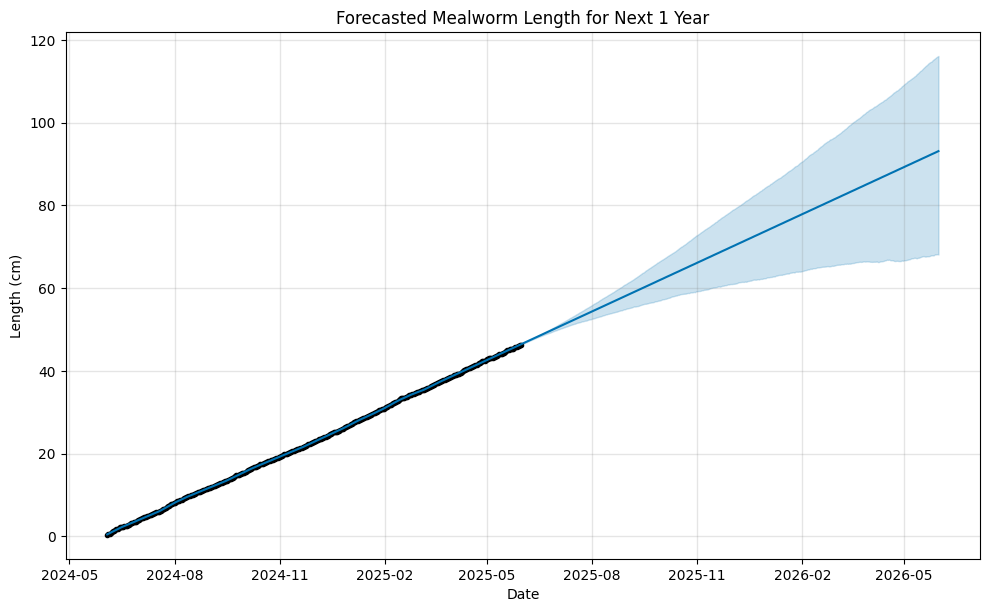

In [51]:
import matplotlib.pyplot as plt

model.plot(forecast)
plt.title("Forecasted Mealworm Length for Next 1 Year")
plt.xlabel("Date")
plt.ylabel("Length (cm)")
plt.grid(True)
plt.show()


## **LSTM**

In [52]:
pip install numpy pandas matplotlib scikit-learn tensorflow

In [53]:
import pandas as pd

# Load your dataset
df = pd.read_csv('preprocessed_input.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Select just the 'Length_cm'
length_series = df[['Date', 'Length_cm']].copy()
length_series.set_index('Date', inplace=True)


In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
length_scaled = scaler.fit_transform(length_series)

# For inverse transformation later
length_scaled_df = pd.DataFrame(length_scaled, index=length_series.index, columns=['Length_cm'])


In [55]:
import numpy as np

def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 30  # use last 30 days to predict next day
X, y = create_sequences(length_scaled, window_size)


In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Reshape for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))
model.fit(X, y, epochs=20, batch_size=16)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.2672
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0018
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.3422e-04
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.4211e-04
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 4.9278e-04
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 4.0095e-04
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 3.9952e-04
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 3.1299e-04
Epoch 10/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.5861e-04
Epoch 11/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 2.3215e-04
Epoch 12/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 9.5987e-05
Epoch 13/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.2243e-05
Epoch 14/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.8281e-05
Epoch 15/20
21/21 ━━━━━━━━━

In [57]:
# Start with the last window
last_sequence = length_scaled[-window_size:]
future_predictions = []

current_input = last_sequence.copy()

for _ in range(365):
    pred = model.predict(current_input.reshape(1, window_size, 1), verbose=0)
    future_predictions.append(pred[0, 0])
    current_input = np.append(current_input[1:], pred, axis=0)


In [58]:
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create date range for next 365 days
future_dates = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=365)

future_df = pd.DataFrame({
    'date': future_dates,
    'Predicted_Length_cm': future_predictions.flatten()
})


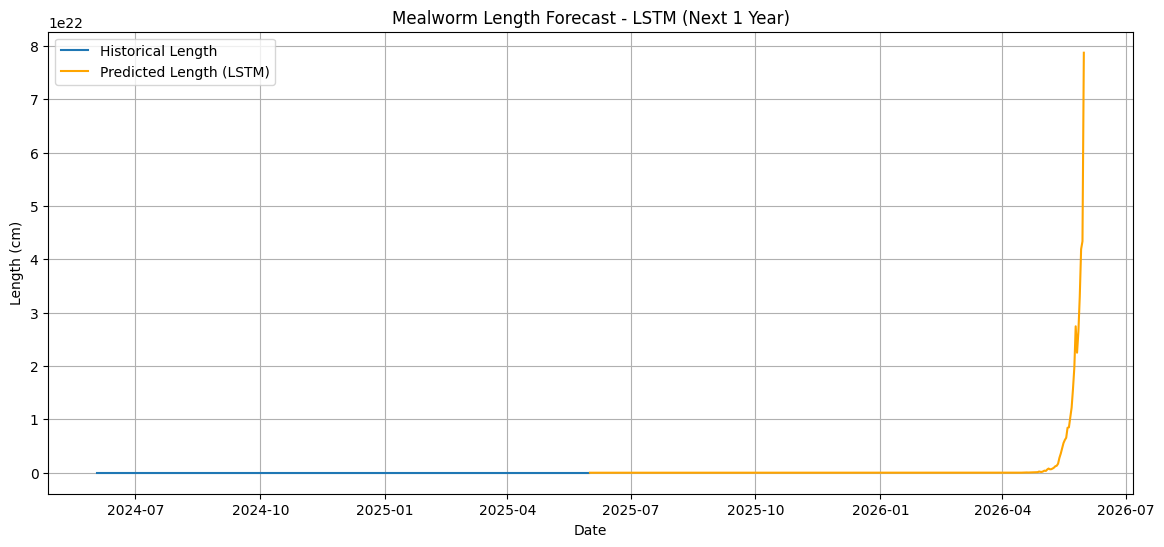

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(length_series.index, length_series['Length_cm'], label='Historical Length')
plt.plot(future_df['date'], future_df['Predicted_Length_cm'], label='Predicted Length (LSTM)', color='orange')
plt.title('Mealworm Length Forecast - LSTM (Next 1 Year)')
plt.xlabel('Date')
plt.ylabel('Length (cm)')
plt.legend()
plt.grid(True)
plt.show()


In [60]:
future_df

,date,Predicted_Length_cm
0,2025-06-01,4.686050e+01
1,2025-06-02,4.703150e+01
2,2025-06-03,4.720883e+01
3,2025-06-04,4.739049e+01
4,2025-06-05,4.757609e+01
...,...,...
360,2026-05-27,2.649549e+22
361,2026-05-28,3.304042e+22
362,2026-05-29,4.191577e+22
363,2026-05-30,4.339330e+22


## **Arima**

In [ ]:
pip install pandas matplotlib pmdarima


In [ ]:
pip install numpy==1.24.4 pandas==1.5.3 scipy==1.10.1 pmdarima==2.0.4


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('preprocessed_input.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
length_series = df.set_index('Date')['Length_cm']


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(length_series, label='Historical Length')
plt.title("Mealworm Length Over Time")
plt.xlabel("Date")
plt.ylabel("Length (mm)")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
from pmdarima import auto_arima

# Automatically select the best (p,d,q) parameters
model = auto_arima(length_series, seasonal=False, stepwise=True, suppress_warnings=True)
print(model.summary())


In [ ]:
# Forecast future 365 days
forecast = model.predict(n_periods=365)

# Generate future dates
future_dates = pd.date_range(start=length_series.index[-1] + pd.Timedelta(days=1), periods=365)

# Combine into a DataFrame
forecast_df = pd.DataFrame({
    'date': future_dates,
    'Predicted_Length_mm': forecast
})

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(length_series.index, length_series.values, label='Historical Length')
plt.plot(forecast_df['date'], forecast_df['Predicted_Length_mm'], label='Forecasted Length (ARIMA)', color='red')
plt.title('Mealworm Length Forecast - ARIMA (Next 1 Year)')
plt.xlabel('Date')
plt.ylabel('Length (mm)')
plt.legend()
plt.grid(True)
plt.show()
